In [60]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [61]:
data = pd.read_csv("Toyota-Corolla.csv")
print(data.head(6))


   Price  Age     KM Fuel_Type  HP  Met_Color  Automatic    cc  Doors  \
0  13500   23  46986    Diesel  90          1          0  2000      3   
1  13750   23  72937    Diesel  90          1          0  2000      3   
2  13950   24  41711    Diesel  90          1          0  2000      3   
3  14950   26  48000    Diesel  90          0          0  2000      3   
4  13750   30  38500    Diesel  90          0          0  2000      3   
5  12950   32  61000    Diesel  90          0          0  2000      3   

   Mfr_Guarantee  ...  ABS  Airco  Automatic_airco  Boardcomputer  CD_Player  \
0              0  ...    1      0                0              1          0   
1              0  ...    1      1                0              1          1   
2              1  ...    1      0                0              1          0   
3              1  ...    1      0                0              1          0   
4              1  ...    1      1                0              1          0   
5       

In [62]:
data.count()

Price               1436
Age                 1436
KM                  1436
Fuel_Type           1436
HP                  1436
Met_Color           1436
Automatic           1436
cc                  1436
Doors               1436
Mfr_Guarantee       1436
Guarantee_Period    1436
ABS                 1436
Airco               1436
Automatic_airco     1436
Boardcomputer       1436
CD_Player           1436
Central_Lock        1436
Powered_Windows     1436
Power_Steering      1436
Mistlamps           1436
Sport_Model         1436
dtype: int64

In [63]:
N, p = data.shape
print("Dataset contains {} samples and {} features.".format(N, p))

Dataset contains 1436 samples and 21 features.


In [64]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Price             1436 non-null   int64 
 1   Age               1436 non-null   int64 
 2   KM                1436 non-null   int64 
 3   Fuel_Type         1436 non-null   object
 4   HP                1436 non-null   int64 
 5   Met_Color         1436 non-null   int64 
 6   Automatic         1436 non-null   int64 
 7   cc                1436 non-null   int64 
 8   Doors             1436 non-null   int64 
 9   Mfr_Guarantee     1436 non-null   int64 
 10  Guarantee_Period  1436 non-null   int64 
 11  ABS               1436 non-null   int64 
 12  Airco             1436 non-null   int64 
 13  Automatic_airco   1436 non-null   int64 
 14  Boardcomputer     1436 non-null   int64 
 15  CD_Player         1436 non-null   int64 
 16  Central_Lock      1436 non-null   int64 
 17  Powered_Window

In [65]:
data.isnull().sum()

Price               0
Age                 0
KM                  0
Fuel_Type           0
HP                  0
Met_Color           0
Automatic           0
cc                  0
Doors               0
Mfr_Guarantee       0
Guarantee_Period    0
ABS                 0
Airco               0
Automatic_airco     0
Boardcomputer       0
CD_Player           0
Central_Lock        0
Powered_Windows     0
Power_Steering      0
Mistlamps           0
Sport_Model         0
dtype: int64

In [66]:
data_g = data.groupby(['Doors'])
data_g['Doors'].size()


Doors
2      2
3    622
4    138
5    674
Name: Doors, dtype: int64

In [67]:

data_g = data.groupby(['Fuel_Type'])
data_g['Fuel_Type'].size()

Fuel_Type
CNG         17
Diesel     155
Petrol    1264
Name: Fuel_Type, dtype: int64

In [68]:
data_g = data[["Fuel_Type", "Price"]].groupby("Fuel_Type").mean()
data_g

,Price
Fuel_Type,
CNG,9421.176471
Diesel,11294.554839
Petrol,10679.310127


In [69]:
##  Diesel class is more expensive

In [70]:
data_g = data[["ABS", "Price"]].groupby("ABS").mean()
data_g

,Price
ABS,
0,8413.626866
1,11262.510274


In [71]:
data_g = data[["Met_Color", "Price"]].groupby("Met_Color").mean()
data_g

,Price
Met_Color,
0,10162.047109
1,11004.941176


In [72]:
data_g = data[["Doors", "Price"]].groupby("Doors").mean()
data_g

,Price
Doors,
2,8100.000000
3,10107.342444
4,9806.768116
5,11503.209199


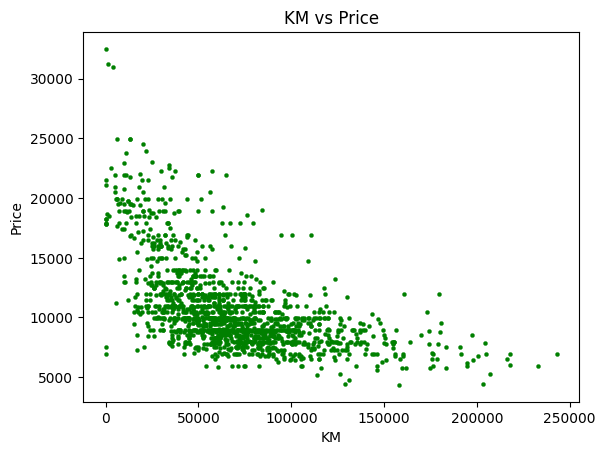

In [73]:
X=data["KM"]
y= data["Price"]
plt.scatter(X,y,color='green',marker="." ,linewidth=0.2)
plt.title("KM vs Price")
plt.xlabel("KM")
plt.ylabel("Price")
plt.show()

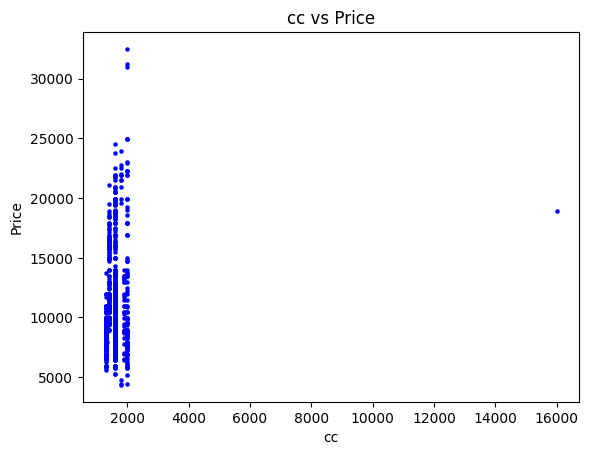

In [74]:
X=data["cc"]
y= data["Price"]
plt.scatter(X,y,color='blue',marker="." ,linewidth=0.2)
plt.title("cc vs Price")
plt.xlabel("cc")
plt.ylabel("Price")
plt.show()

In [75]:
import seaborn as sns
%matplotlib inline

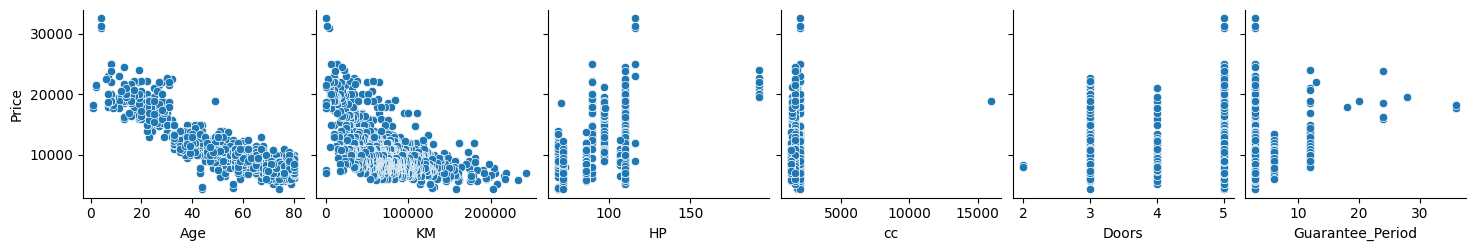

In [76]:
sns.pairplot(
    data,
    x_vars=["Age", "KM", "HP", "cc","Doors","Guarantee_Period"],
    y_vars=["Price"],
)

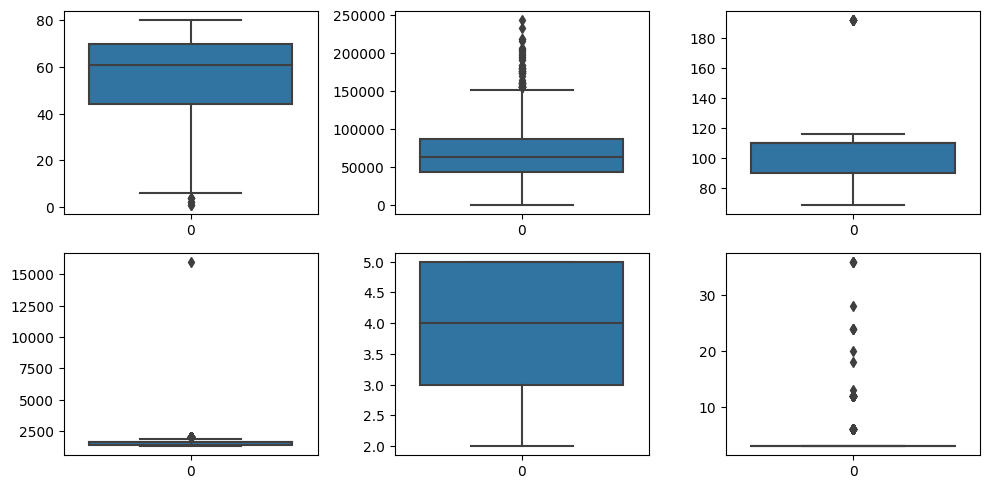

In [77]:
fig, axs = plt.subplots(2,3, figsize = (10,5))
plt1 = sns.boxplot(data['Age'], ax = axs[0,0])
plt2 = sns.boxplot(data['KM'], ax = axs[0,1])
plt3 = sns.boxplot(data['HP'], ax = axs[0,2])
plt1 = sns.boxplot(data['cc'], ax = axs[1,0])
plt2 = sns.boxplot(data['Doors'], ax = axs[1,1])
plt3 = sns.boxplot(data['Guarantee_Period'], ax = axs[1,2])


plt.tight_layout()

In [78]:
showfliers=False

In [79]:
data['CNG']=data['Fuel_Type'].apply(lambda x:1 if "CNG" in x else 0)
data['Diesel']=data['Fuel_Type'].apply(lambda x:1 if "Diesel" in x else 0)
data['Petrol']=data['Fuel_Type'].apply(lambda x:1 if "Petrol" in x else 0)

In [80]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Price             1436 non-null   int64 
 1   Age               1436 non-null   int64 
 2   KM                1436 non-null   int64 
 3   Fuel_Type         1436 non-null   object
 4   HP                1436 non-null   int64 
 5   Met_Color         1436 non-null   int64 
 6   Automatic         1436 non-null   int64 
 7   cc                1436 non-null   int64 
 8   Doors             1436 non-null   int64 
 9   Mfr_Guarantee     1436 non-null   int64 
 10  Guarantee_Period  1436 non-null   int64 
 11  ABS               1436 non-null   int64 
 12  Airco             1436 non-null   int64 
 13  Automatic_airco   1436 non-null   int64 
 14  Boardcomputer     1436 non-null   int64 
 15  CD_Player         1436 non-null   int64 
 16  Central_Lock      1436 non-null   int64 
 17  Powered_Window

In [81]:
df=data.drop('Fuel_Type',axis=1)

In [82]:
df.head(10)

,Price,Age,KM,HP,Met_Color,Automatic,cc,Doors,Mfr_Guarantee,Guarantee_Period,...,Boardcomputer,CD_Player,Central_Lock,Powered_Windows,Power_Steering,Mistlamps,Sport_Model,CNG,Diesel,Petrol
0,13500,23,46986,90,1,0,2000,3,0,3,...,1,0,1,1,1,0,0,0,1,0
1,13750,23,72937,90,1,0,2000,3,0,3,...,1,1,1,0,1,0,0,0,1,0
2,13950,24,41711,90,1,0,2000,3,1,3,...,1,0,0,0,1,0,0,0,1,0
3,14950,26,48000,90,0,0,2000,3,1,3,...,1,0,0,0,1,0,0,0,1,0
4,13750,30,38500,90,0,0,2000,3,1,3,...,1,0,1,1,1,1,0,0,1,0
5,12950,32,61000,90,0,0,2000,3,0,3,...,1,0,1,1,1,1,0,0,1,0
6,16900,27,94612,90,1,0,2000,3,0,3,...,1,0,1,1,1,0,1,0,1,0
7,18600,30,75889,90,1,0,2000,3,1,3,...,1,1,1,1,1,0,0,0,1,0
8,21500,27,19700,192,0,0,1800,3,0,3,...,0,0,1,1,1,0,0,0,0,1
9,12950,23,71138,69,0,0,1900,3,0,3,...,1,0,0,0,1,0,0,0,1,0


In [83]:
y = data.pop("Price")

In [84]:
y

0       13500
1       13750
2       13950
3       14950
4       13750
        ...  
1431     7500
1432    10845
1433     8500
1434     7250
1435     6950
Name: Price, Length: 1436, dtype: int64

In [85]:
df

,Price,Age,KM,HP,Met_Color,Automatic,cc,Doors,Mfr_Guarantee,Guarantee_Period,...,Boardcomputer,CD_Player,Central_Lock,Powered_Windows,Power_Steering,Mistlamps,Sport_Model,CNG,Diesel,Petrol
0,13500,23,46986,90,1,0,2000,3,0,3,...,1,0,1,1,1,0,0,0,1,0
1,13750,23,72937,90,1,0,2000,3,0,3,...,1,1,1,0,1,0,0,0,1,0
2,13950,24,41711,90,1,0,2000,3,1,3,...,1,0,0,0,1,0,0,0,1,0
3,14950,26,48000,90,0,0,2000,3,1,3,...,1,0,0,0,1,0,0,0,1,0
4,13750,30,38500,90,0,0,2000,3,1,3,...,1,0,1,1,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1,0,1300,3,1,3,...,0,0,1,1,1,1,1,0,0,1
1432,10845,72,19000,86,0,0,1300,3,0,3,...,0,0,0,0,1,0,1,0,0,1
1433,8500,71,17016,86,0,0,1300,3,0,3,...,0,0,0,0,1,0,0,0,0,1
1434,7250,70,16916,86,1,0,1300,3,1,3,...,0,0,0,0,0,0,0,0,0,1


In [86]:
X=df

In [87]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [88]:
X_train.shape

(1077, 23)

In [89]:
X_test.shape

(359, 23)

In [90]:
y_train.shape

(1077,)

In [91]:
y_test.shape

(359,)

In [92]:

from sklearn.linear_model import LinearRegression
lr_model = LinearRegression()


In [93]:
lr_model.fit(X_train, y_train )

LinearRegression()

In [94]:
training_acc=lr_model.score(X_train,y_train)
print("Training accuracy of the LinearRegression = {:.4f}".format(training_acc))

Training accuracy of the LinearRegression = 1.0000


In [95]:
testing_acc=lr_model.score(X_test,y_test)
print("Testing accuracy of the LinearRegression = {:.4f}".format(testing_acc))

Testing accuracy of the LinearRegression = 1.0000


Text(0, 0.5, 'y_test')

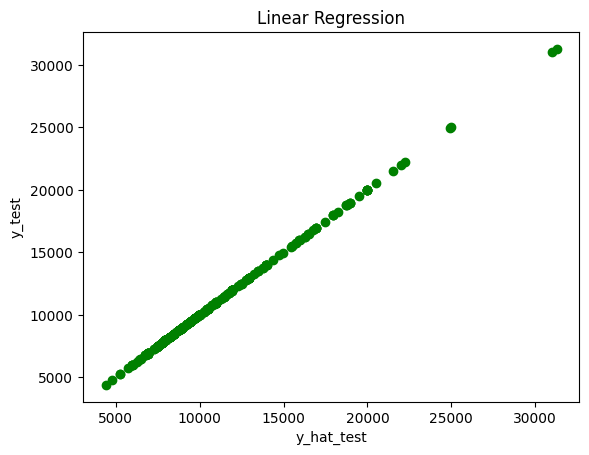

In [96]:
y_hat_test =lr_model.predict(X_test)
plt.title('Linear Regression')
plt.scatter(y_hat_test,y_test ,color="green")
plt.xlabel("y_hat_test")
plt.ylabel("y_test")


In [97]:
from sklearn.metrics import mean_squared_error

from sklearn.metrics import r2_score

y_hat_test =lr_model.predict(X_test)

mse = mean_squared_error(y_test,y_hat_test)
r2 = r2_score(y_test, y_hat_test)

print("Training set MSE = {:.2f}".format(mse))
print("Training set R-sqaured = {:.2f}".format(r2))

Training set MSE = 0.00
Training set R-sqaured = 1.00


In [98]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(n_estimators=50)
model.fit(X_train,y_train)

RandomForestClassifier(n_estimators=50)

In [99]:
training_acc=model.score(X_train,y_train)
print("Training accuracy of the RandomForestClassifier = {:.4f}".format(training_acc))

Training accuracy of the RandomForestClassifier = 1.0000


In [100]:
testing_acc=model.score(X_test,y_test)
print("Testing accuracy of the  RandomForestClassifier = {:.4f}".format(testing_acc))

Testing accuracy of the  RandomForestClassifier = 0.4039


Text(0, 0.5, 'y_test')

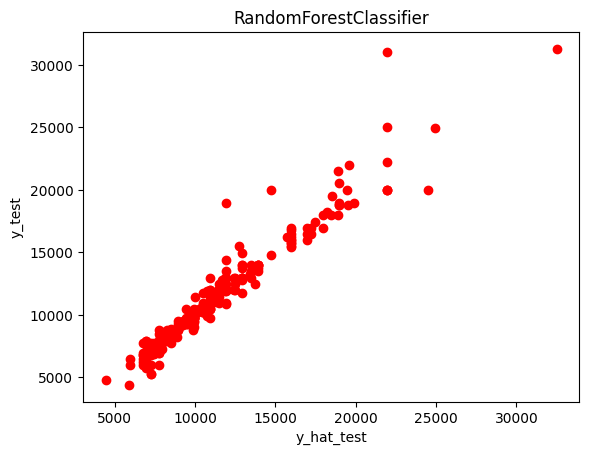

In [112]:
## draw a plot
y_hat_test =model.predict(X_test)
plt.title('RandomForestClassifier')
plt.scatter(y_hat_test,y_test ,color="Red")
plt.xlabel("y_hat_test")
plt.ylabel("y_test")


In [102]:
from sklearn.metrics import mean_squared_error

from sklearn.metrics import r2_score

y_hat_test_1=model.predict(X_test)

mse = mean_squared_error(y_test,y_hat_test_1)
r2 = r2_score(y_test,y_hat_test_1)

print("Training set MSE = {:.2f}".format(mse))
print("Training set R-sqaured = {:.2f}".format(r2))

Training set MSE = 874733.57
Training set R-sqaured = 0.94


In [103]:
from sklearn.svm import SVC
svm = SVC(kernel='rbf', decision_function_shape='ovr')
svm.fit(X_train,y_train)

SVC()

In [109]:
training_acc=svm.score(X_train,y_train)
print("Training accuracy of the svm = {:.4f}".format(training_acc))

Training accuracy of the svm = 0.0808


In [110]:
testing_acc=lr_model.score(X_test,y_test)
print("Testing accuracy of the svm = {:.4f}".format(testing_acc))

Testing accuracy of the svm = 1.0000


In [106]:
from sklearn.metrics import mean_squared_error

from sklearn.metrics import r2_score

y_hat_test_1=svm.predict(X_test)

mse = mean_squared_error(y_test,y_hat_test_1)
r2 = r2_score(y_test,y_hat_test_1)

print("Training set MSE = {:.2f}".format(mse))
print("Training set R-sqaured = {:.2f}".format(r2))

Training set MSE = 15267159.75
Training set R-sqaured = -0.06


Text(0, 0.5, 'y_test')

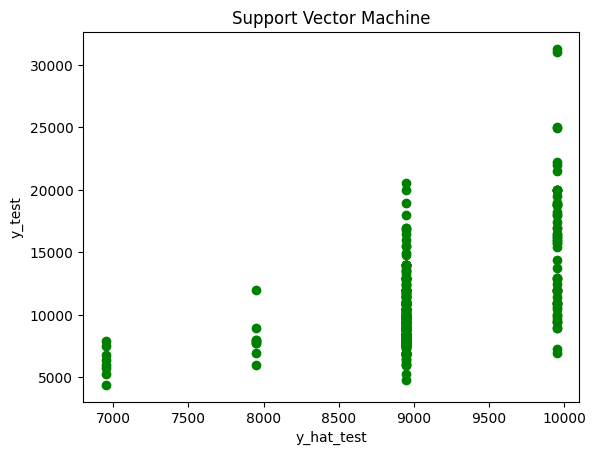

In [111]:
y_hat_test =svm.predict(X_test)
plt.title('Support Vector Machine')
plt.scatter(y_hat_test,y_test ,color="green")
plt.xlabel("y_hat_test")
plt.ylabel("y_test")